#**Import and install dependencies on colab**

In [29]:
!pip install umap-learn
!pip install phate scprep s_gd2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import decomposition
cmap='BuGn_r'
lol= ['#a61551','#d9424d','#f67b4a','#febf6f','#feefa4','#f2f9a9','#bee5a0','#75c8a5','#388eba','#5e50a2']    


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


MNIST DATA SET

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import umap

sns.set(context="paper", style="white")

mnist = fetch_openml("mnist_784", version=1)
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, stratify=mnist.target, random_state=42,train_size=0.95
)

In [31]:

sns.set(context="paper", style="white")

SGD ALGORITHM

In [32]:
import s_gd2
from scipy.spatial.distance import pdist, squareform

In [33]:
def sgd(D, n_components=2, random_state=None, init=None,num_dimensions=None):
    """Metric MDS using stochastic gradient descent
    Parameters
    ----------
    D : array-like, shape=[n_samples, n_samples]
        pairwise distances
    n_components : int, optional (default: 2)
        number of dimensions in which to embed `D`
    random_state : int or None, optional (default: None)
        numpy random state
    init : array-like or None
        Initialization algorithm or state to use for MMDS
    Returns
    -------
    Y : array-like, embedded data [n_sample, ndim]
    """

    N = D.shape[0]
    D = squareform(D)
    # Metric MDS from s_gd2
    Y = s_gd2.mds_direct(N, D, init=init, random_seed=random_state,num_dimensions=num_dimensions)
    return Y

PCA

In [34]:
from sklearn import decomposition
#Dimensionality reduction using PCA, denoise and better capture of the global structure 
#of the data for UMAP proyection
pca = decomposition.PCA(n_components=500,random_state=1)
pca.fit(X_test)
X = pca.transform(X_test)
print(X.shape)

(3500, 500)


VISUALAZING PICTURES

In [35]:
from matplotlib import offsetbox

def plot_components(data, proj, images=None, ax=None,
                    thumb_frac=0.01, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = proj
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 5
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

#**PCA manifold** 

#**Real data**

In [36]:
import pandas as pd
import numpy as np
import os 
#count matrix
!gdown --id 10AUDnRh7mitOBOQzo0DLLict_EnlpbtG
!gdown --id 17h8H0axCYGNE5XEkupb6LGNQUFx06Pvd

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10AUDnRh7mitOBOQzo0DLLict_EnlpbtG
To: /content/expression_matrix.txt
100% 126M/126M [00:00<00:00, 148MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17h8H0axCYGNE5XEkupb6LGNQUFx06Pvd
To: /content/clusters.txt
100% 52.6k/52.6k [00:00<00:00, 37.8MB/s]


In [37]:
#este funciona
data = pd.read_table('expression_matrix.txt')
data = data.set_index('Unnamed: 0')
data = data.T
data

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0.0,76.13,0.05,0.0,0.00,0.00,0.00,0.0,0.0,0.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1401.76,242.94,242.94
A01101402,0.0,512.73,10.11,0.0,0.00,146.61,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1397.16,539.54,539.54
A01101403,0.0,172.75,0.00,0.0,0.00,23.65,0.00,0.0,0.0,72.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332.88,341.45,341.45
A01101404,0.0,170.56,0.02,0.0,0.00,117.60,0.00,0.0,0.0,125.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1442.66,260.02,260.02
A01101405,0.0,113.87,0.04,0.0,0.00,180.93,0.00,0.0,0.0,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749.68,348.10,348.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z11041427,0.0,106.52,0.00,0.0,0.08,221.36,0.00,0.0,0.0,141.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1514.75,433.01,433.01
Z11041428,0.0,349.73,0.00,0.0,0.00,262.66,88.02,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1949.32,787.32,787.32
Z11041429,0.0,1.54,1.17,0.0,0.00,219.92,0.00,0.0,0.0,94.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1829.42,506.35,506.35
Z11041430,0.0,0.54,7.65,0.0,43.42,272.64,0.00,0.0,0.0,78.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1275.09,709.91,709.91


In [38]:
clusters = pd.read_table('clusters.txt',skiprows=1)
clusters

,TYPE,group,group.1
0,A01101401,GABA_Vip,Vip_Mybpc1
1,A01101402,GABA_Vip,Vip_Parm1
2,A01101403,Gluta_L4,L4_Ctxn3
3,A01101404,GABA_Vip,Vip_Chat
4,A01101405,GABA_Vip,Vip_Parm1
...,...,...,...
1674,Z11041427,GABA_Vip,Vip_Chat
1675,Z11041428,GABA_Vip,Vip_Chat
1676,Z11041429,GABA_Vip,Vip_Chat
1677,Z11041430,GABA_Vip,Vip_Chat


In [39]:
all_label_1= ['GABA_Vip', 'Gluta_L4', 'Gluta_L2_3', 'Gluta_L2', 'GABA_Pvalb',
       'GABA_Ndnf', 'Gluta_L5a', 'NonNeu_SMC', 'NonNeu_Astro', 'Gluta_L5',
       'NonNeu_Micro', 'NonNeu_Endo', 'GABA_Sst', 'Gluta_L6b',
       'GABA_Sncg', 'GABA_Igtp', 'NonNeu_Oligo', 'GABA_Smad3',
       'NonNeu_OPC', 'Gluta_L5b', 'Gluta_L6a']

In [40]:
all_label= ['#FFFF91', '#0055FA', '#1C67F9', '#3E7FFE', '#F91D12',
       '#FFA900', '#6095FC', '#6FAB91', '#C3F2DE', '#0793F0',
       '#397159', '#0E472E', '#FFFF00', '#7FC3F1',
       '#E06A40', '#E9B22C', '#179860', '#FAF712',
       '#03F216', '#14DEFA', '#03F2EB']

       

In [41]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FFFF91', '#0055FA', '#1C67F9', '#3E7FFE', '#F91D12',
       '#FFA900', '#6095FC', '#6FAB91', '#C3F2DE', '#0793F0',
       '#397159', '#0E472E', '#FFFF00', '#7FC3F1',
       '#E06A40', '#E9B22C', '#179860', '#FAF712',
       '#03F216', '#14DEFA', '#03F2EB'])

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500, random_state=1)
pca_data= pca.fit_transform(data)

In [43]:
clusters.group.unique()

array(['GABA_Vip', 'Gluta_L4', 'Gluta_L2_3', 'Gluta_L2', 'GABA_Pvalb',
       'GABA_Ndnf', 'Gluta_L5a', 'NonNeu_SMC', 'NonNeu_Astro', 'Gluta_L5',
       'NonNeu_Micro', 'NonNeu_Endo', 'GABA_Sst', 'Gluta_L6b',
       'GABA_Sncg', 'GABA_Igtp', 'NonNeu_Oligo', 'GABA_Smad3',
       'NonNeu_OPC', 'Gluta_L5b', 'Gluta_L6a'], dtype=object)

In [44]:
target=pd.Series(clusters.group)
list_clust = list(np.arange(21))
lut = dict(zip(clusters.group.unique(), list_clust))
row_colors = target.map(lut)
row_colors

0       0
1       0
2       1
3       0
4       0
       ..
1674    0
1675    0
1676    0
1677    0
1678    0
Name: group, Length: 1679, dtype: int64

In [45]:
list_clust

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [46]:
distance_matrix_dist_nuero =pdist(pca_data)
distance_matrix_pca_diff_neuro = (squareform(distance_matrix_dist_nuero))

In [47]:
PCA_UMAP_diff_2D_MSD_sdg_neu = sgd(distance_matrix_pca_diff_neuro,num_dimensions=2,random_state=1)
PCA_UMAP_diff_2D_MSD_sdg_neu

array([[14830.81726794, -1252.15751834],
       [16171.09950148,  5080.1003925 ],
       [ 8323.35113751,  8943.78086847],
       ...,
       [ 9028.00534218,   491.90751625],
       [ 8902.3583167 ,   -56.53954531],
       [ 9935.97483212,   295.2513412 ]])

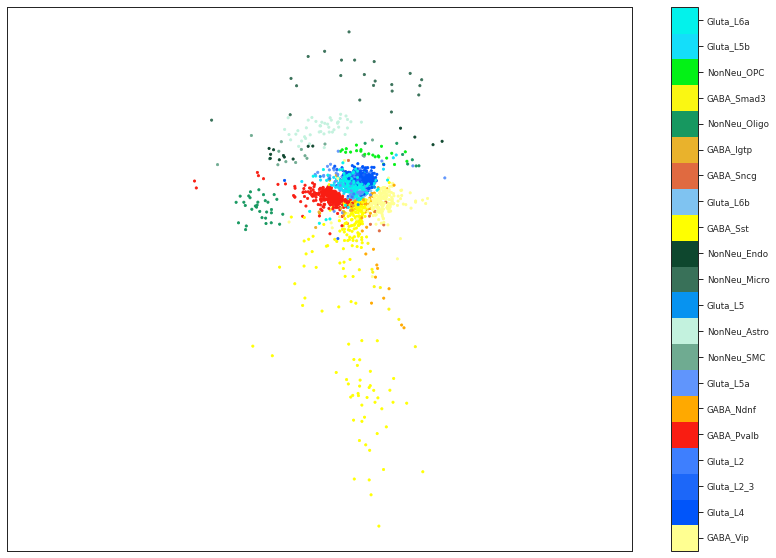

In [51]:

fig, ax = plt.subplots(1, figsize=(14, 10))

plt.scatter(PCA_UMAP_diff_2D_MSD_sdg_neu[:, 0], PCA_UMAP_diff_2D_MSD_sdg_neu[:, 1], c=row_colors.astype('category'), cmap=cmap, s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(22)-0.5)
cbar.set_ticks(np.arange(22))
cbar.set_ticklabels(all_label_1)
